<a href="https://colab.research.google.com/github/marz1307/Monitoring-Player-Performance-and-Scouting-in-Football/blob/main/Defensive_actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_build_play = pd.read_csv("/content/drive/MyDrive/turk/def_action.csv")
df_build_play.head()



Unnamed: 0  clearance  foul  interception  tackle  player_id  \
0           0        107    23           162      18     9433.0   
1           1         74    19           140      14     8643.0   
2           2          9    44            39       0     9637.0   
3           3         33    23           102       4       93.0   
4           4         69    15            71       3    10108.0   

                          name  
0                    Tarkowski  
1                       Lowton  
2                         King  
3  Berg Gu\u00f0munds\u00adson  
4                         Long

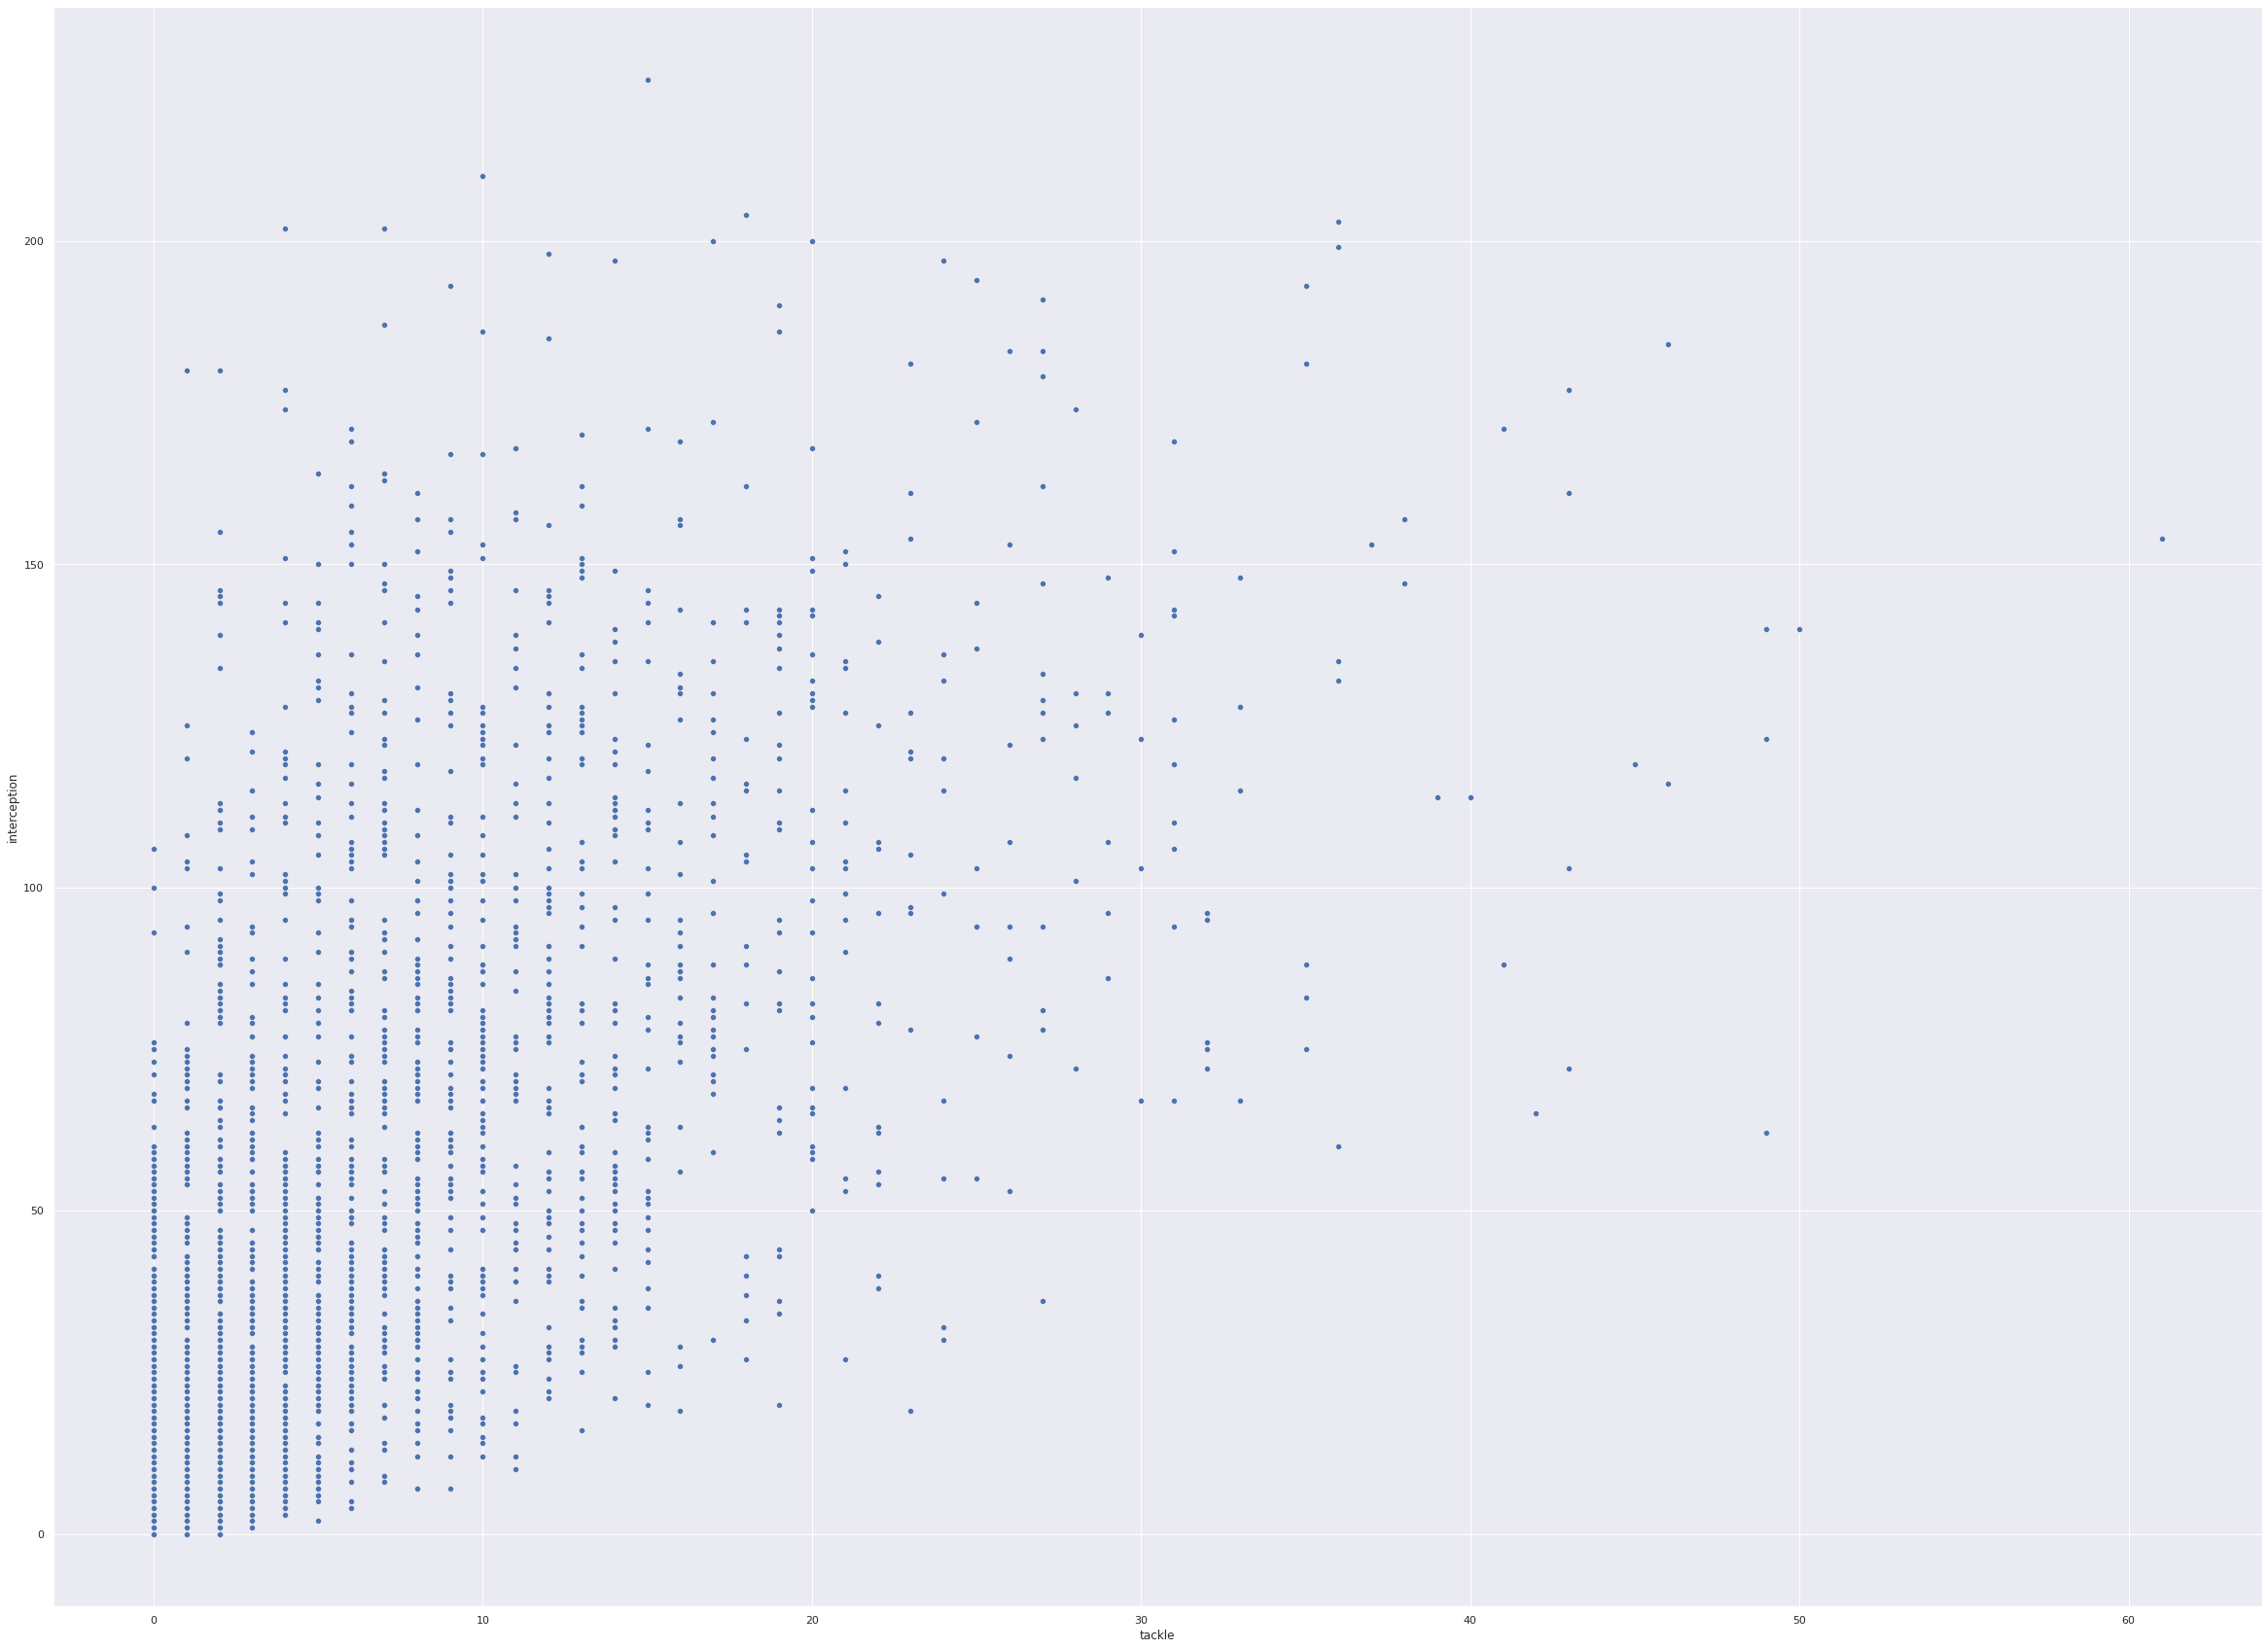

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40.7,30.27)})
sns.scatterplot(data=df_build_play , y= "interception", x="tackle")

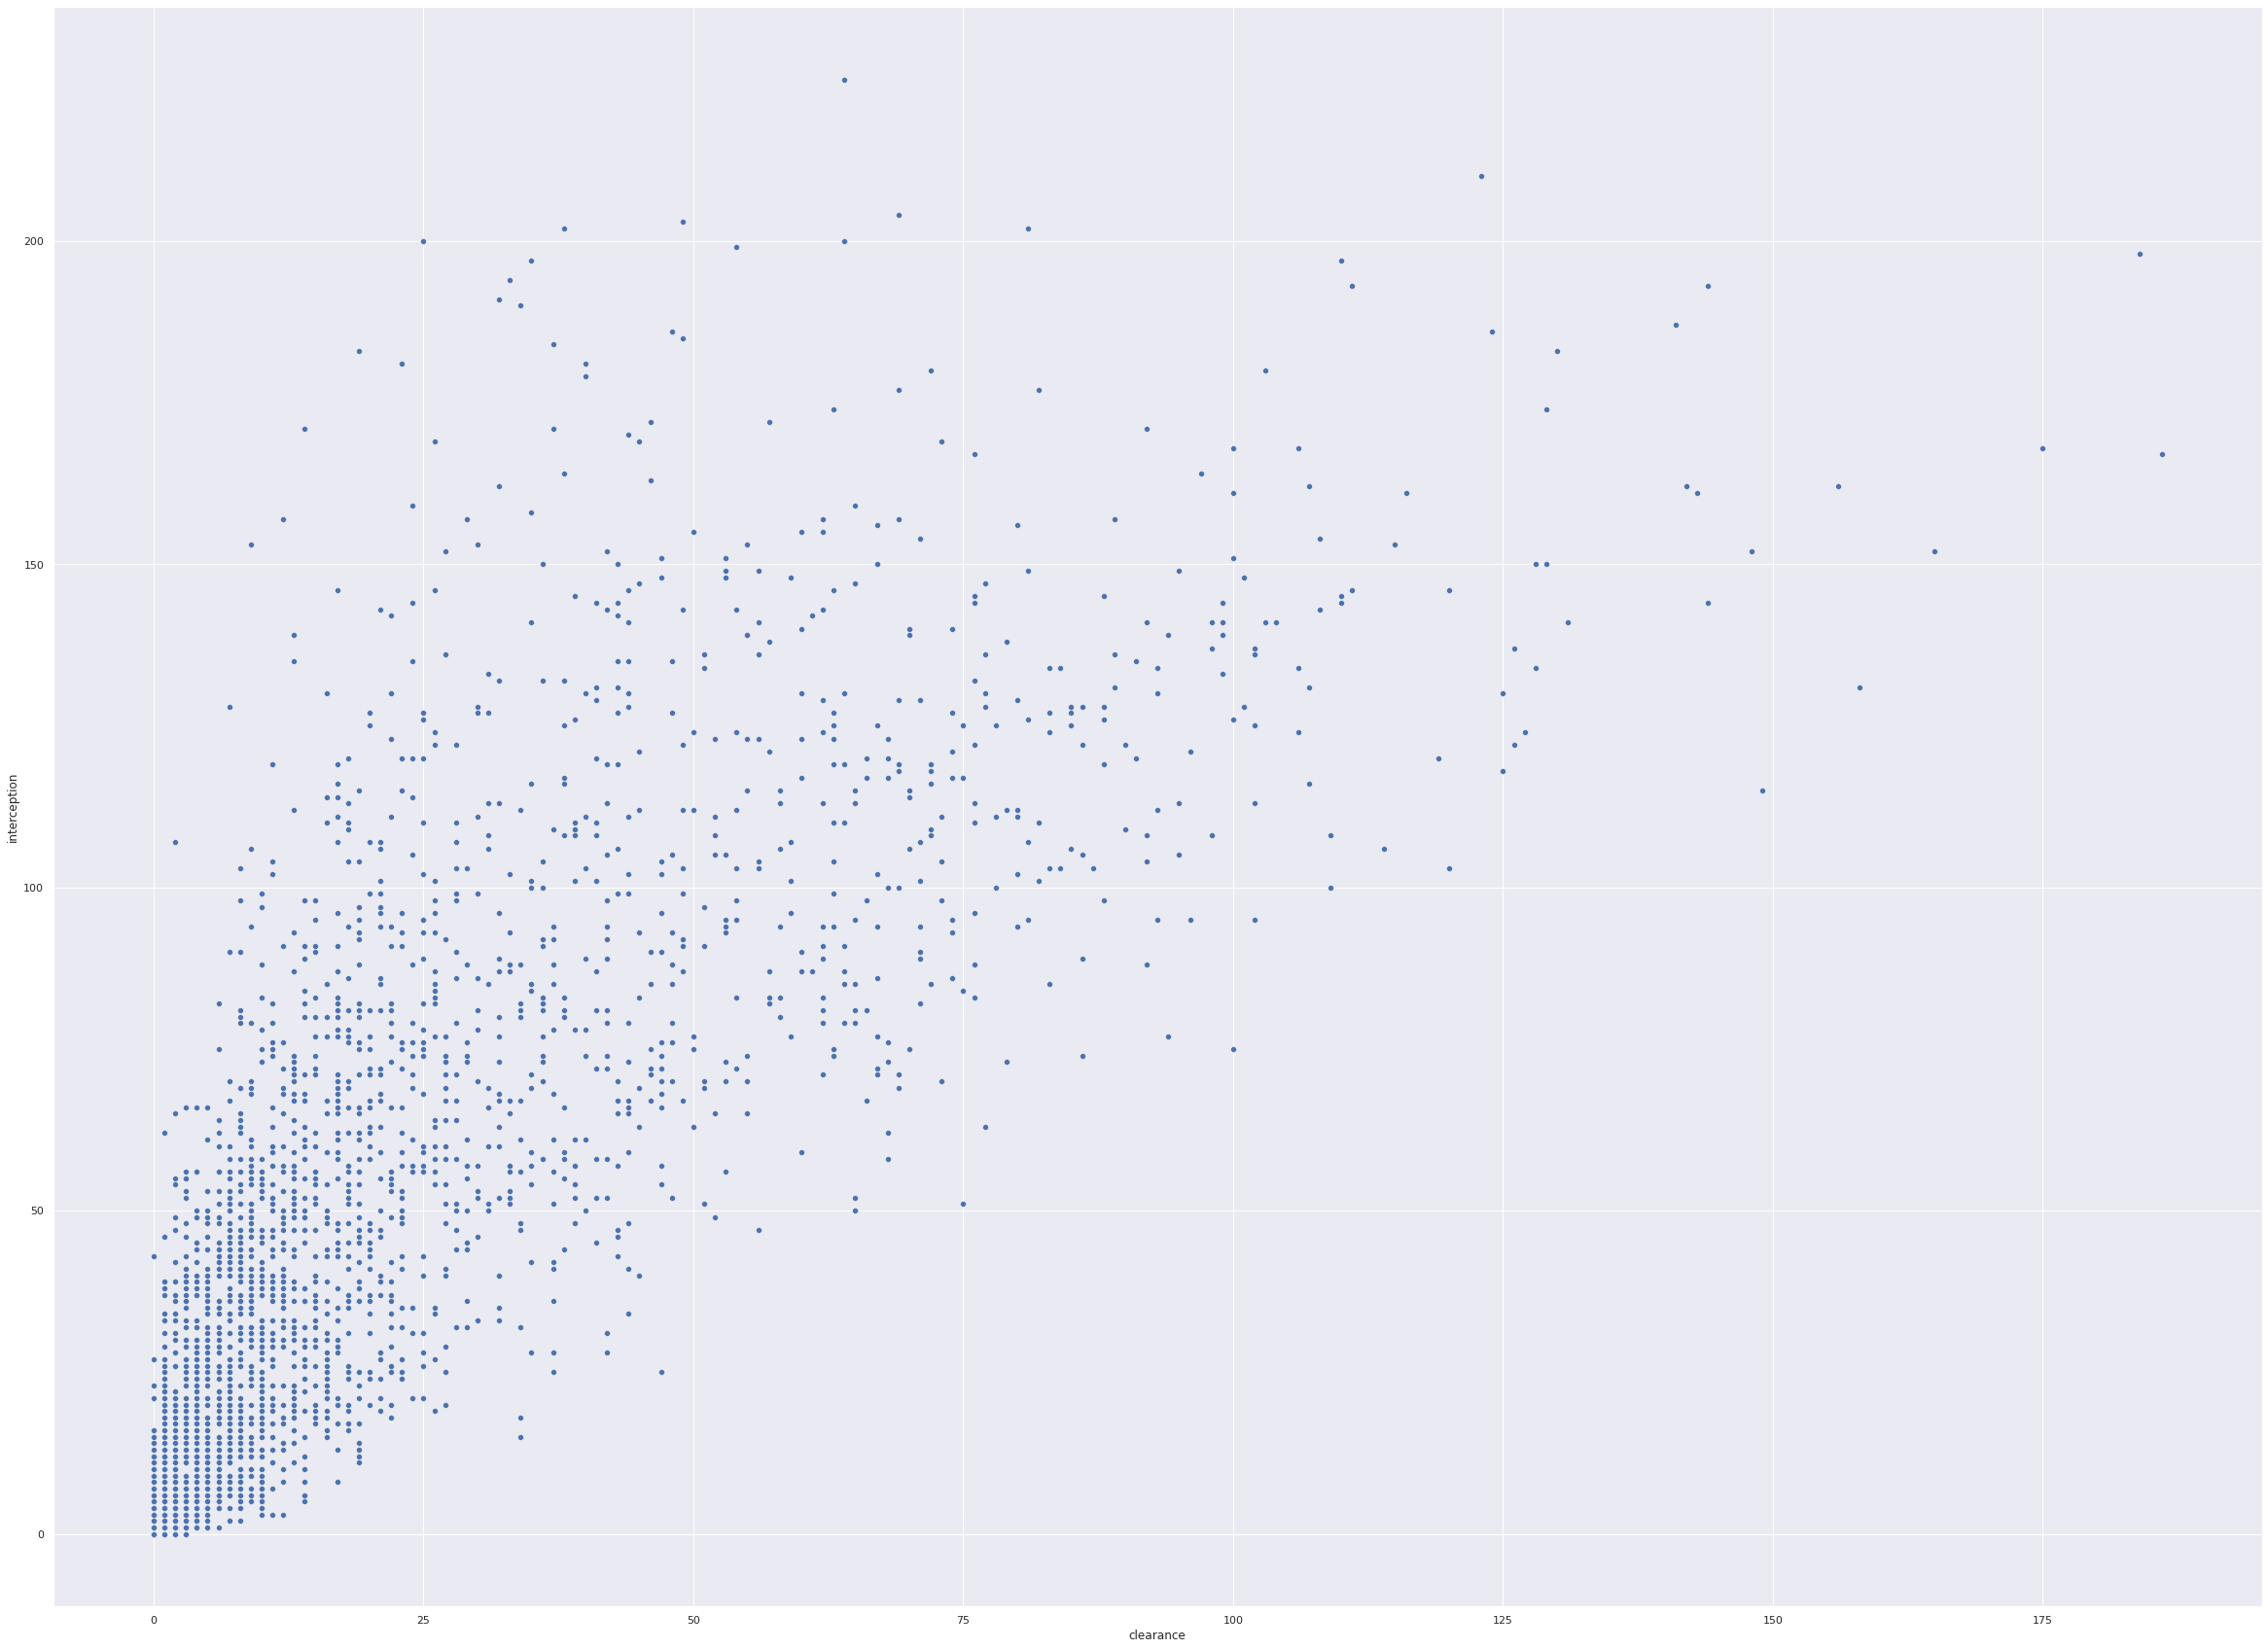

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40.7,30.27)})
sns.scatterplot(data=df_build_play , y= "interception", x="clearance")

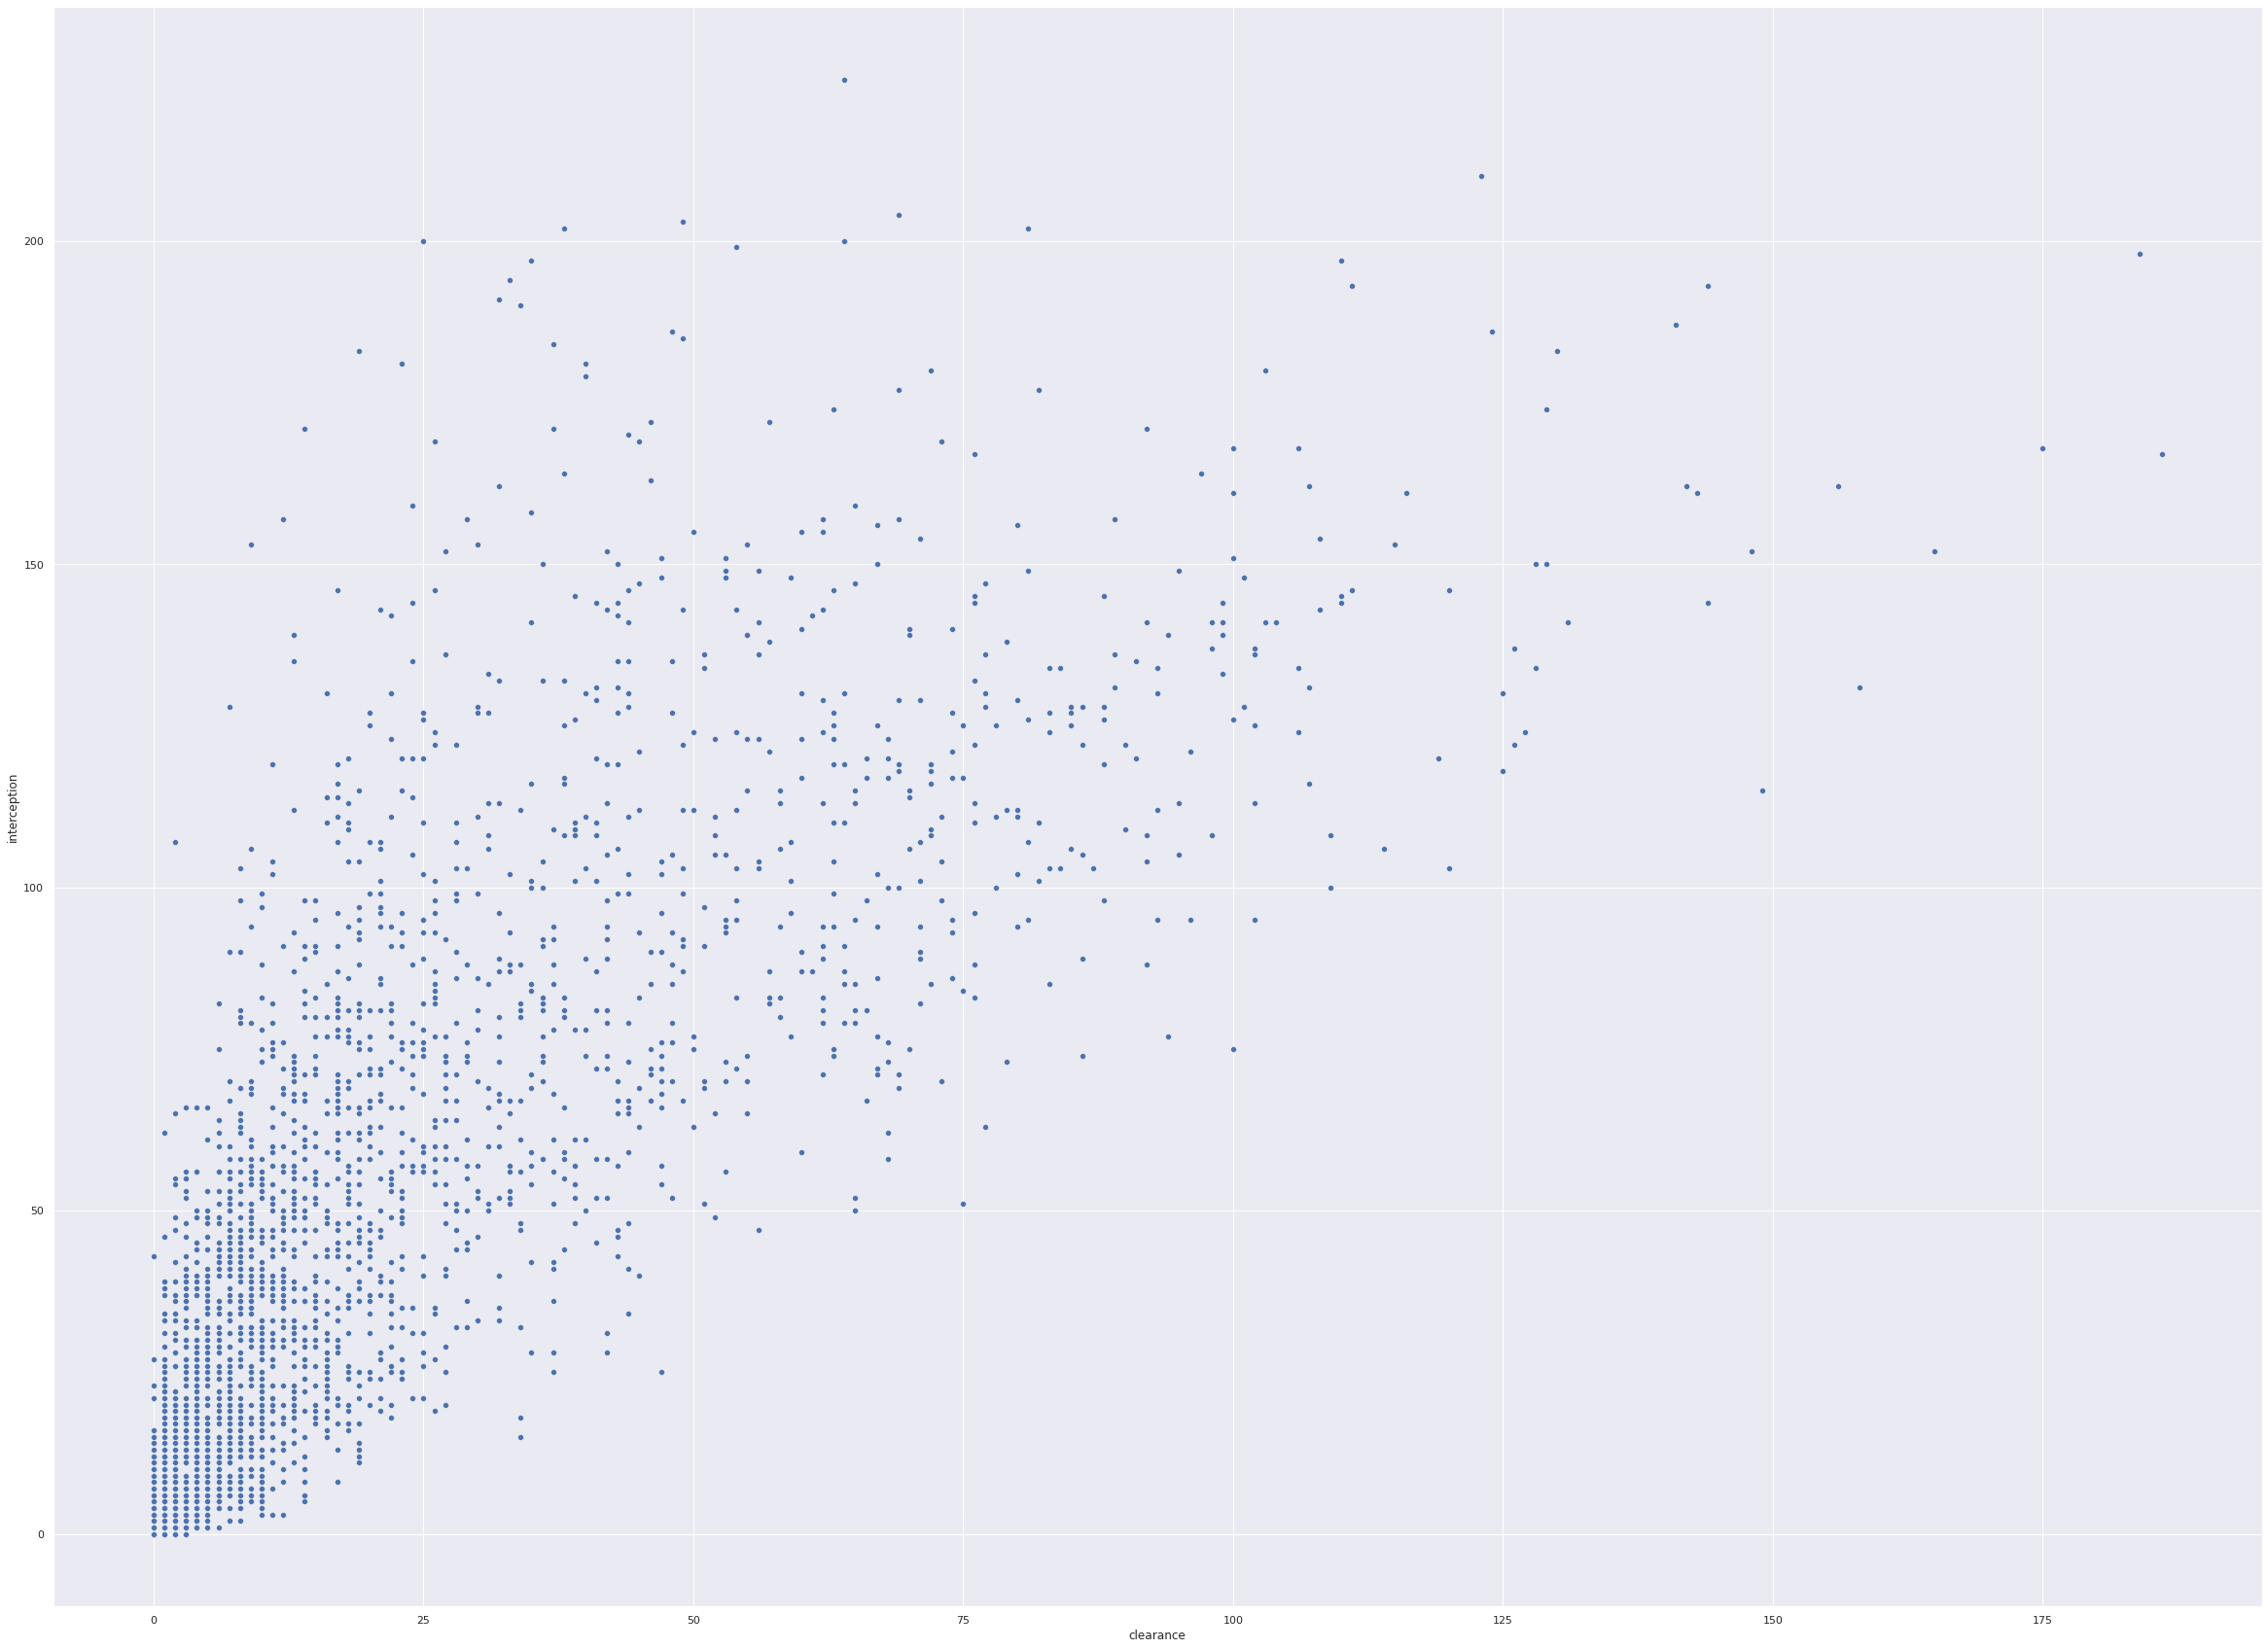

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40.7,30.27)})
sns.scatterplot(data=df_build_play , y= "interception", x="clearance")

In [ ]:
from sklearn.cluster import KMeans
import numpy as np


def kcluster(data , k):

  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)


  return kmeans.predict(data)




In [ ]:
df_build_play_res = df_build_play[["clearance"	,"foul"	,"interception"	,"tackle"]]
df_build_play["class"] = kcluster(df_build_play_res , 5)
df_build_play_res.head()


clearance  foul  interception  tackle
0        107    23           162      18
1         74    19           140      14
2          9    44            39       0
3         33    23           102       4
4         69    15            71       3

In [ ]:
df_build_play

Unnamed: 0  clearance  foul  interception  tackle  player_id  \
0              0        107    23           162      18     9433.0   
1              1         74    19           140      14     8643.0   
2              2          9    44            39       0     9637.0   
3              3         33    23           102       4       93.0   
4              4         69    15            71       3    10108.0   
...          ...        ...   ...           ...     ...        ...   
2945        2945          4     1             2       0   122651.0   
2946        2946          0     0             2       2   122888.0   
2947        2947          0     2             0       1   122671.0   
2948        2948          0     0             3       0   122561.0   
2949        2949          1     0             0       0   122749.0   

                             name  class  
0                       Tarkowski      3  
1                          Lowton      3  
2                            King      2  
3     Berg Gu\u00f0munds\u00adson      4  
4                            Long      4  
...                           ...    ...  
2945                      Hawsawi      0  
2946                    Al Shehri      0  
2947                   Al Sahlawi      0  
2948                    Al Mayouf      0  
2949             Asiri Abu Radiah      0  

[2950 rows x 8 columns]

In [ ]:
import seaborn as sns
def plot_result(data,y,x,palette, name=True,hue='class'):
  plt =sns.scatterplot(data=data , y=y , x=x , hue=hue, palette=palette)
  plt_names = df_build_play
  for i in range(plt_names.shape[0]):
    plt.text(y=plt_names[y][i]+0.3,x=plt_names[x][i]+0.3,s=plt_names['name'][i])

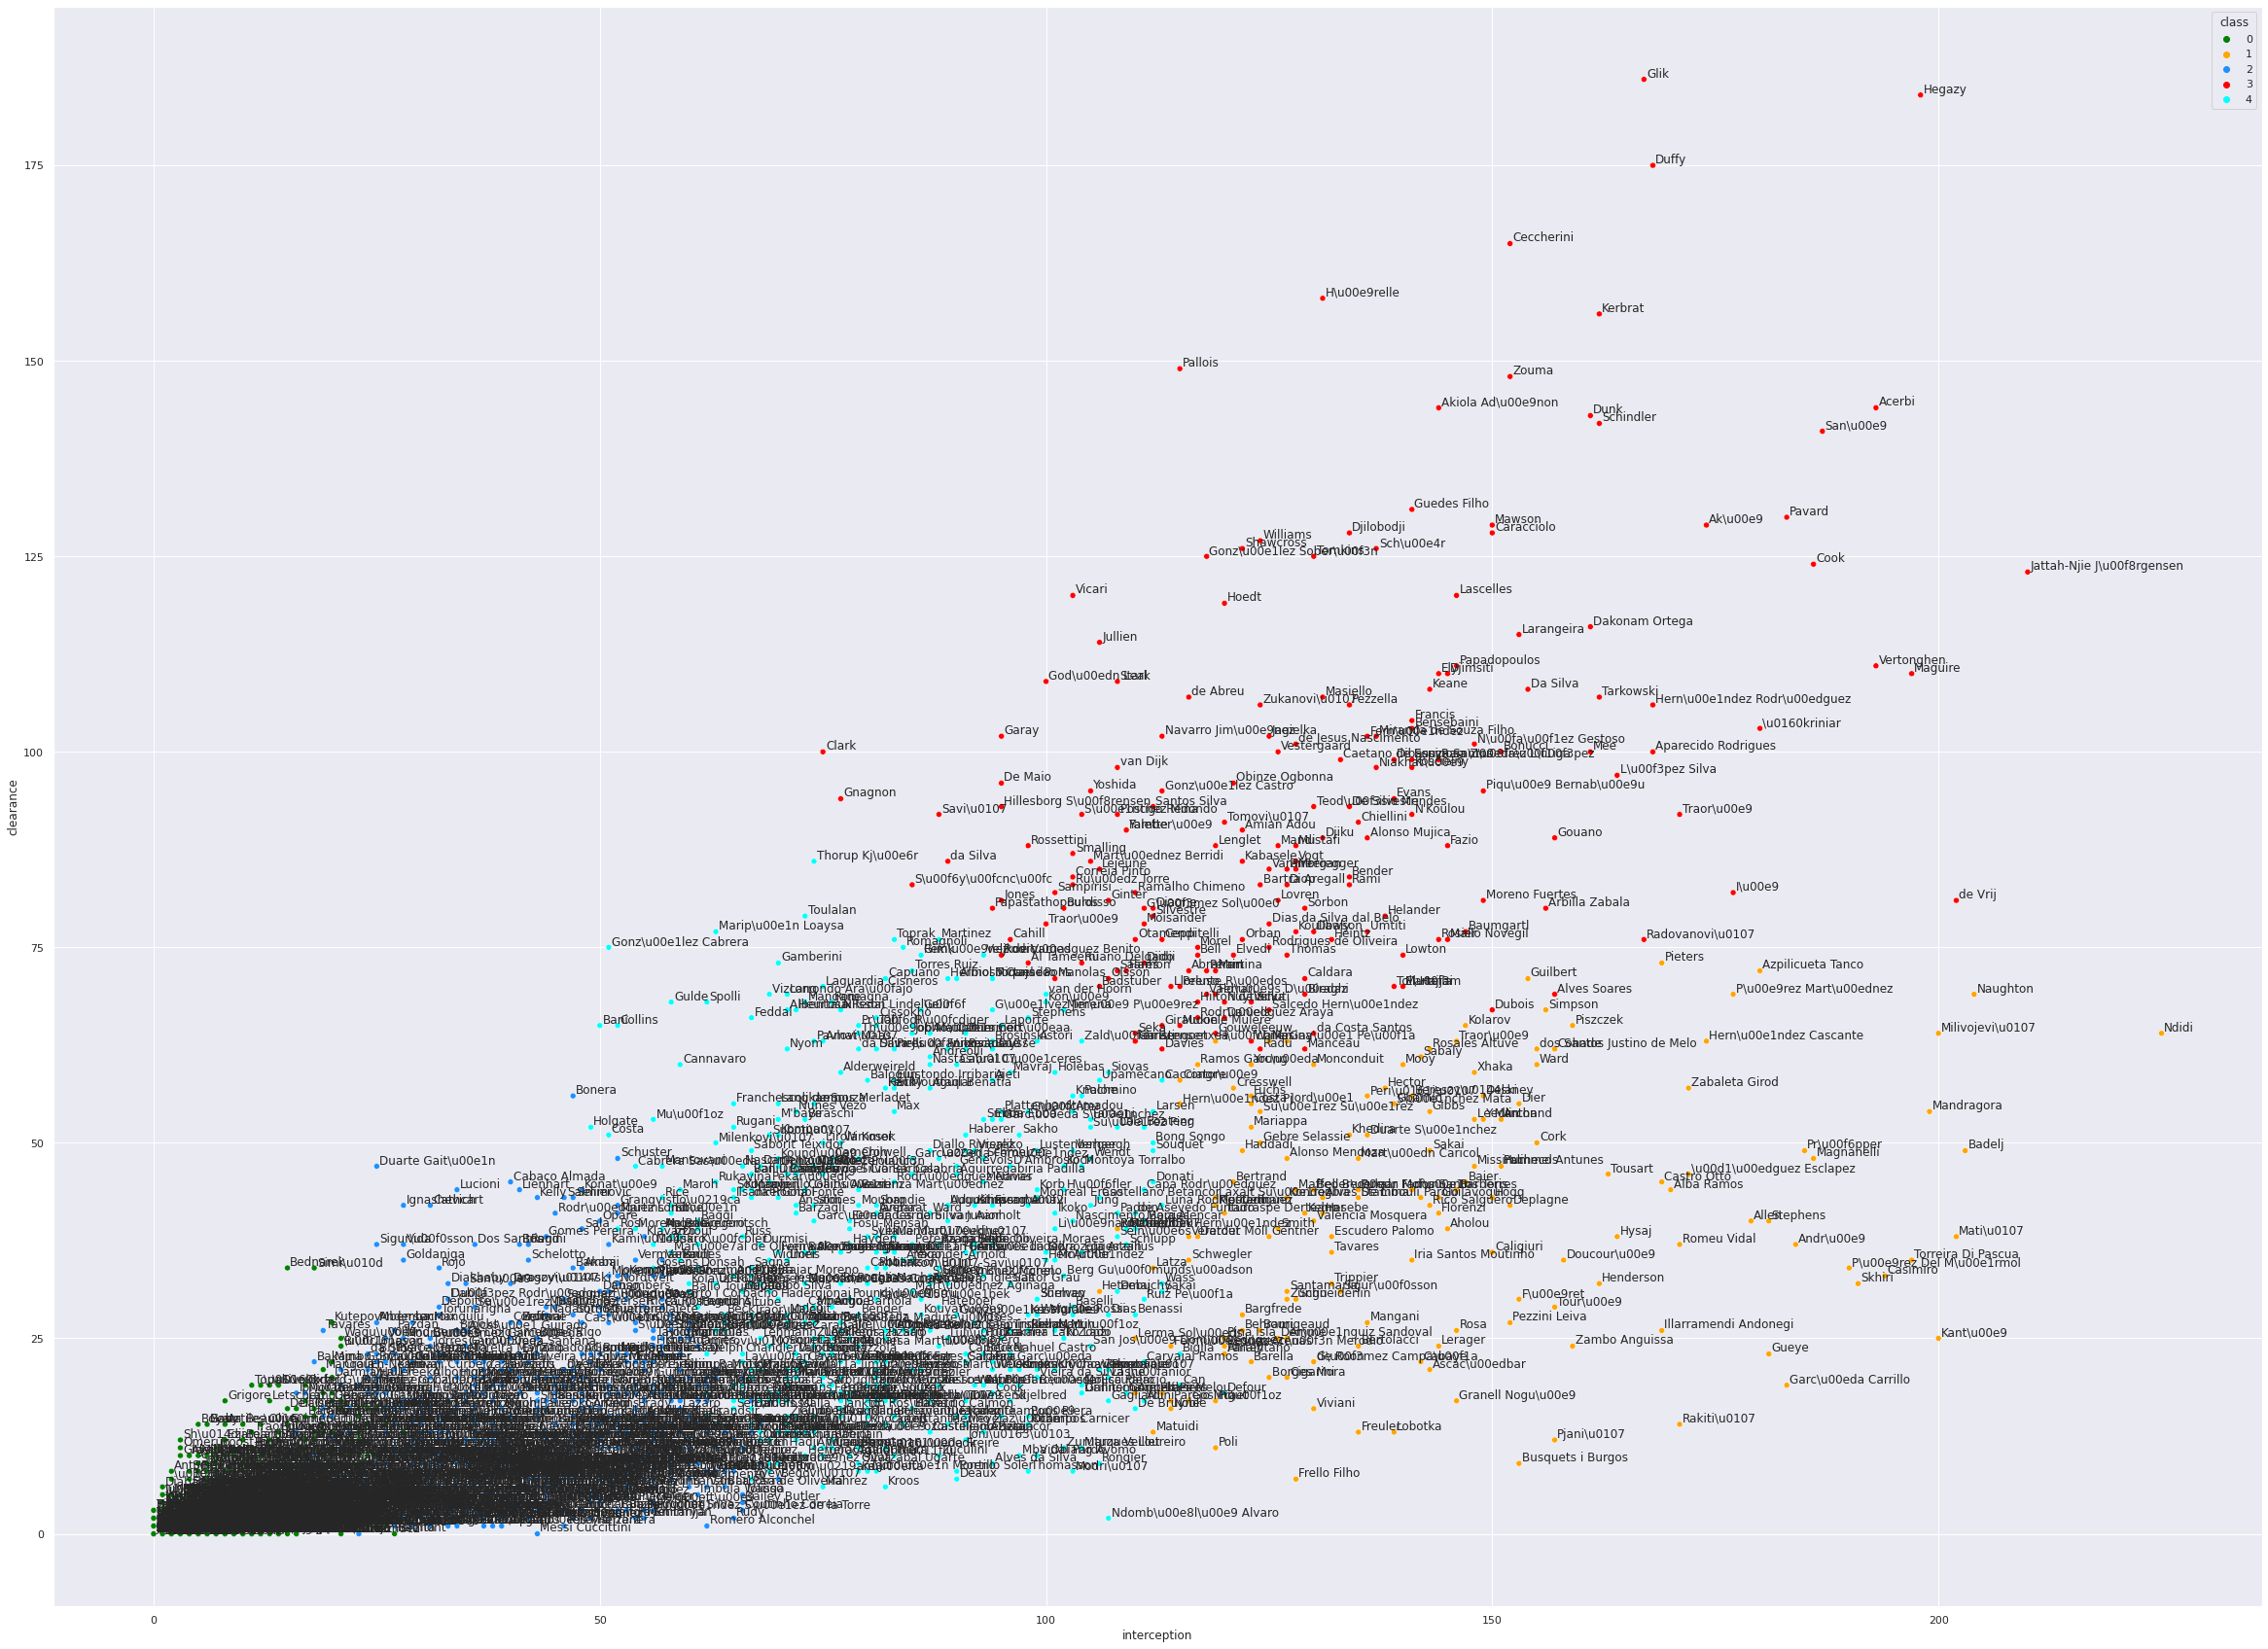

In [ ]:
plot_result(df_build_play,"clearance","interception",['green','orange','dodgerblue','red','cyan'])

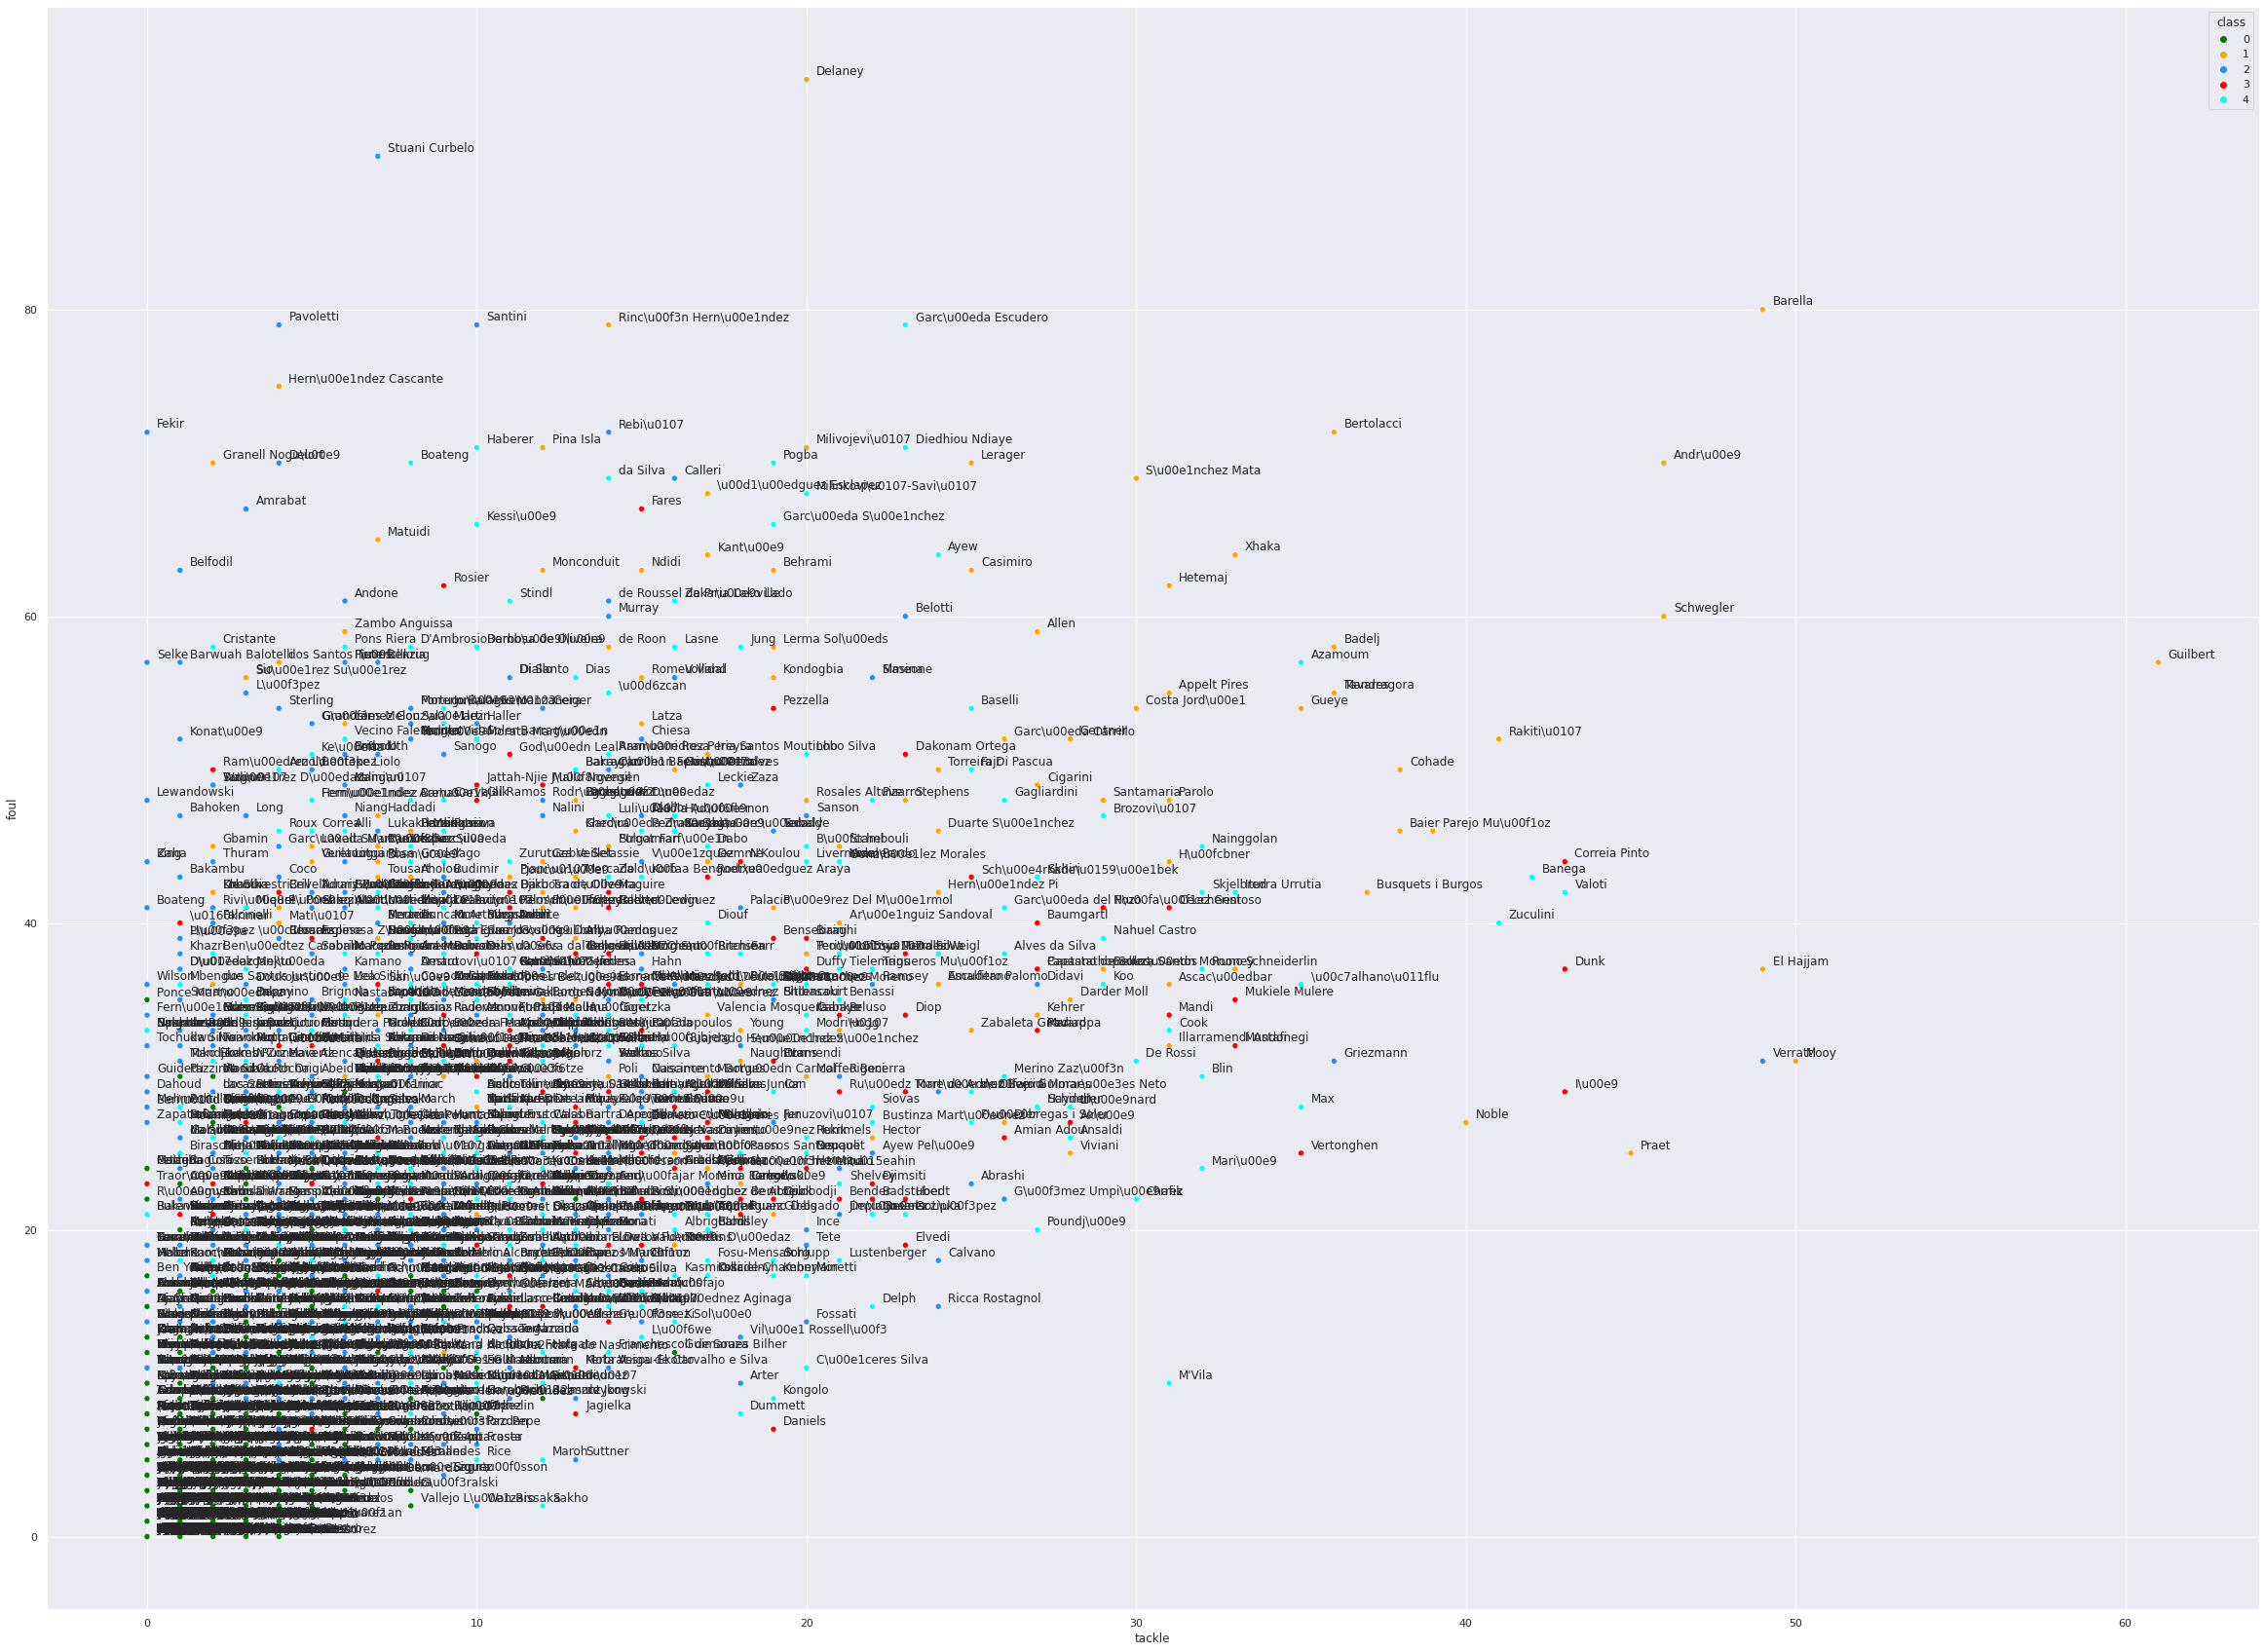

In [ ]:
plot_result(df_build_play,"foul","tackle",['green','orange','dodgerblue','red','cyan'])

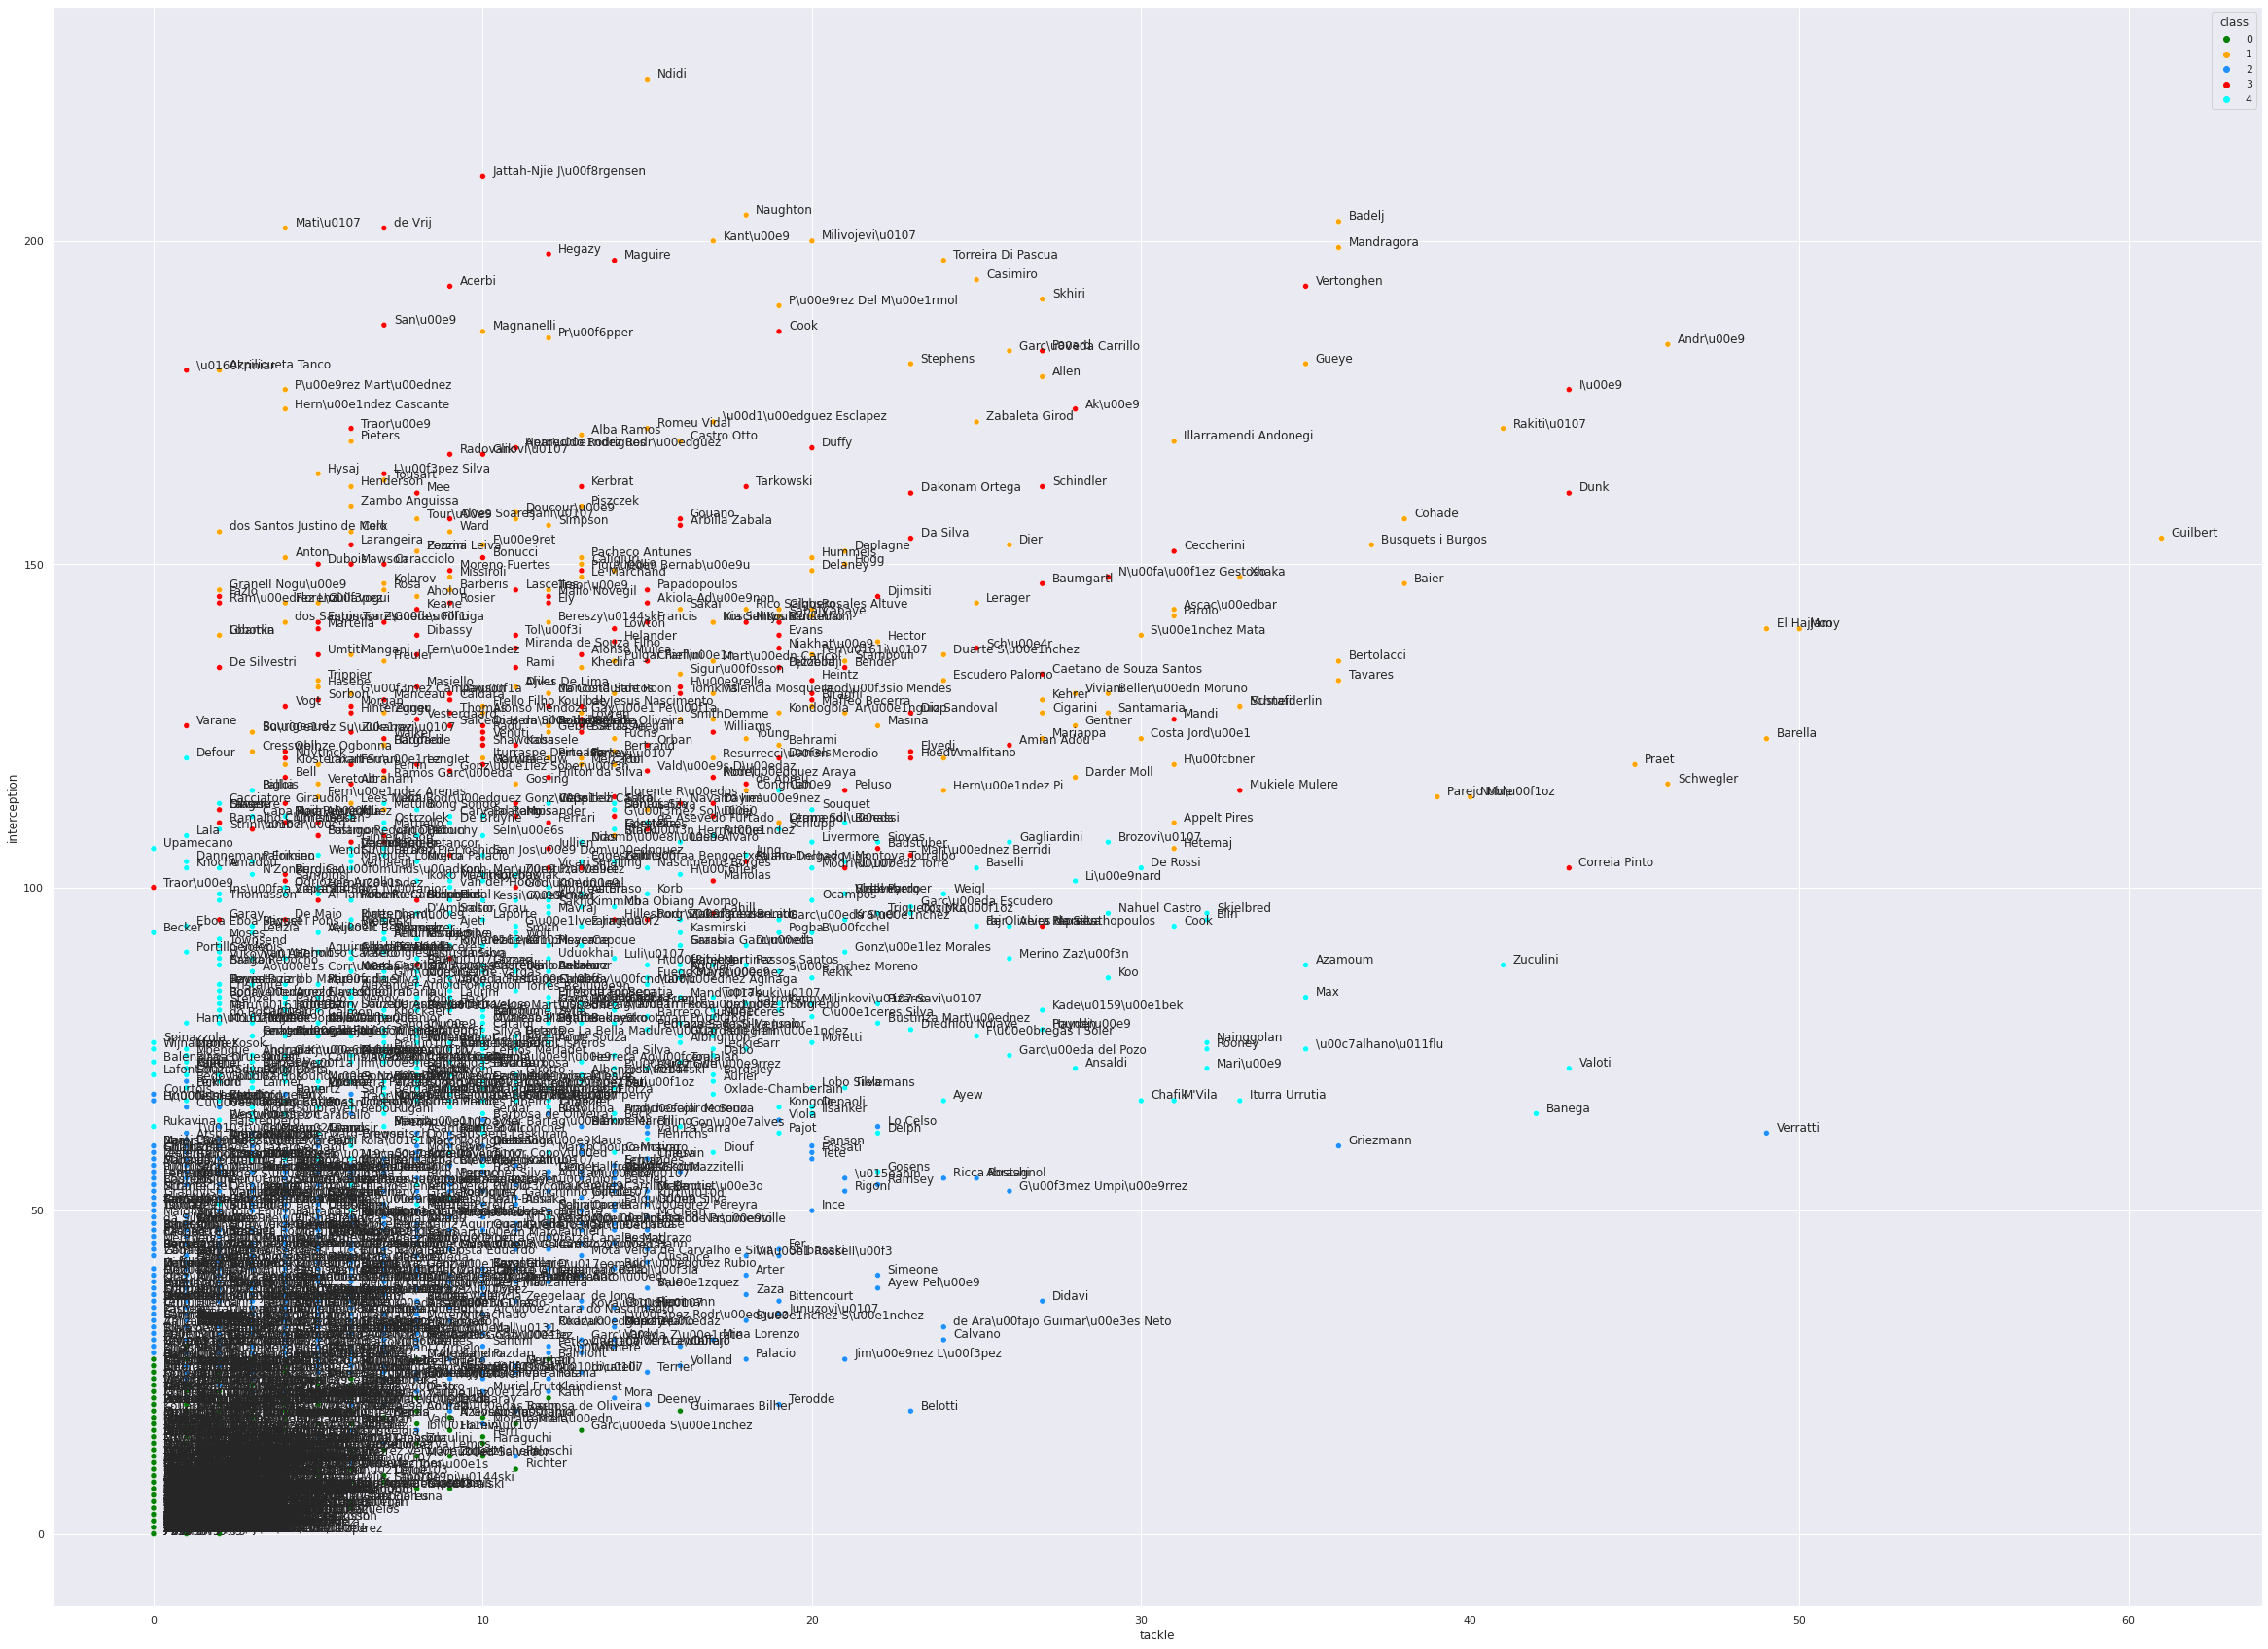

In [ ]:
plot_result(df_build_play,"interception","tackle",['green','orange','dodgerblue','red','cyan'])

### *Defensive Action Quality*

In [ ]:
merge = df_build_play
#merge.columns=["player_id" , "def_class"]

In [ ]:
import pandas as pd

actions = pd.read_csv("/content/drive/MyDrive/turk/Data/players.csv" , usecols=["wyId","shortName"])
actions.columns = ["player_id","shortName"]
df_build_play
act = actions.merge(merge , on="player_id")
act.to_csv("/content/drive/MyDrive/turk/database/def_classes.csv")
act.head()


player_id        shortName  Unnamed: 0  clearance  foul  interception  \
0     393228          M. Sarr         851         14    13            68   
1      32793       A. N'Diaye        2507          5     4             5   
2     393247   I. Konat\u00e9        1077         44    13            48   
3         33     J. Cillessen        2319          1     0             1   
4         36  T. Alderweireld         219         59    13            77   

   tackle          name  class  
0       6          Sarr      2  
1       1       N'Diaye      0  
2       7   Konat\u00e9      2  
3       0     Cillessen      0  
4       4  Alderweireld      4

In [ ]:
actions.count()

player_id    3603
shortName    3603
dtype: int64